In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
df = pd.read_csv("./data/heart.csv")

(303, 14)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [13]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\baxti\AppData\Local\Temp\ipykernel_4128\313670009.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g= df.hist(ax=ax)


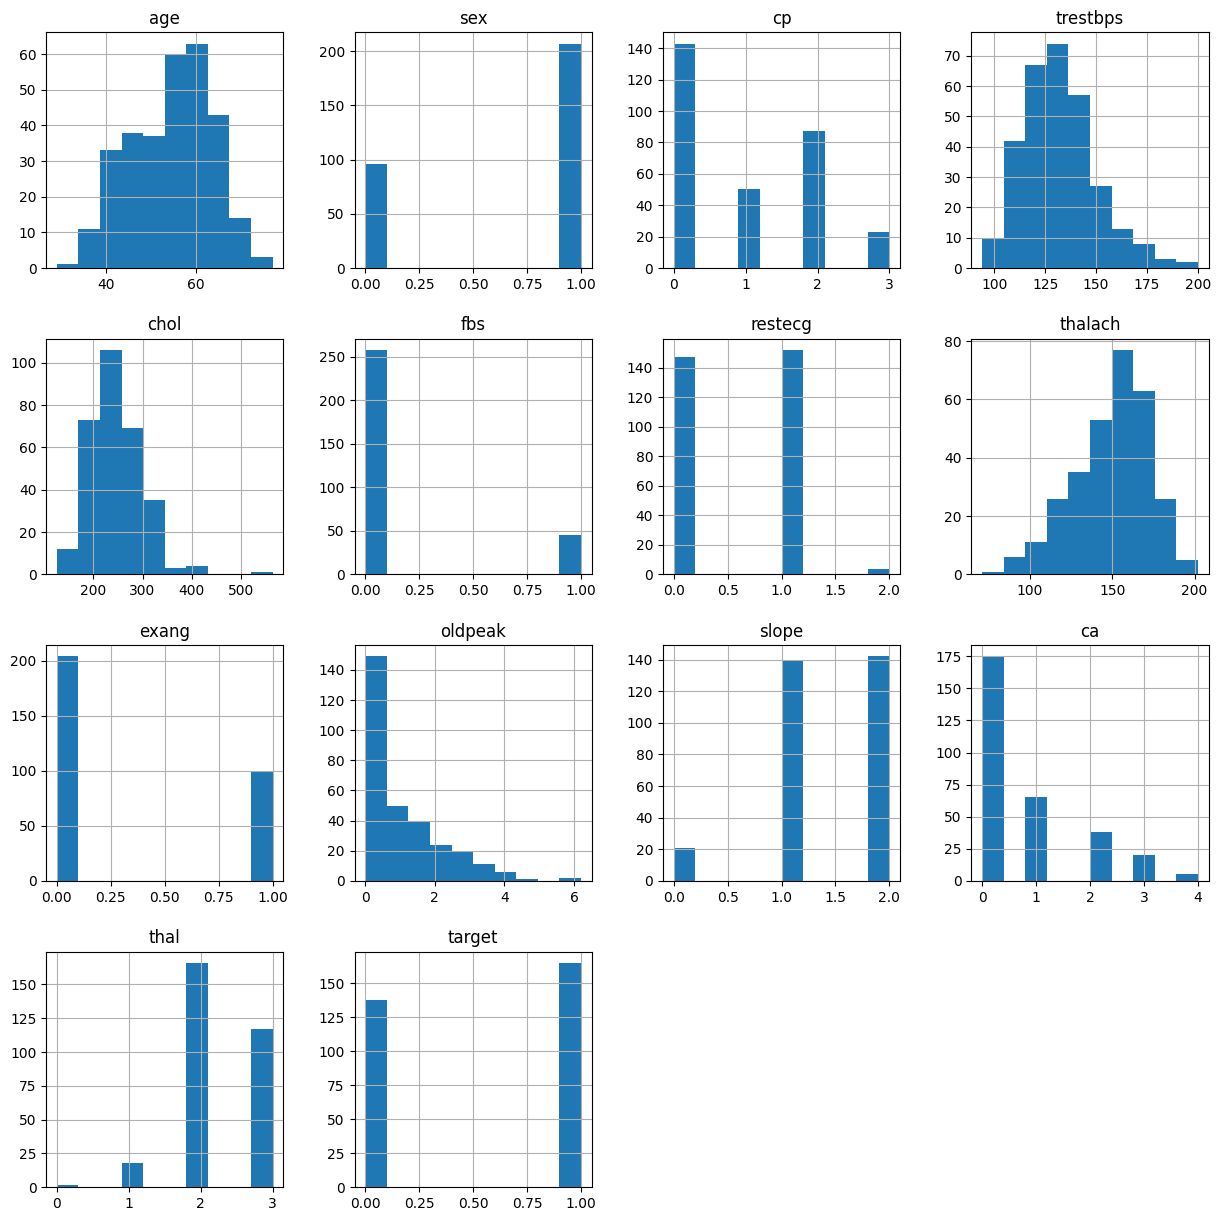

In [14]:
fig = plt.figure(figsize=(15, 15))
ax= fig.gca()
g= df.hist(ax=ax)

In [16]:
X = df.drop("target", axis=1)
y = df["target"]

Text(0, 0.5, 'Count')

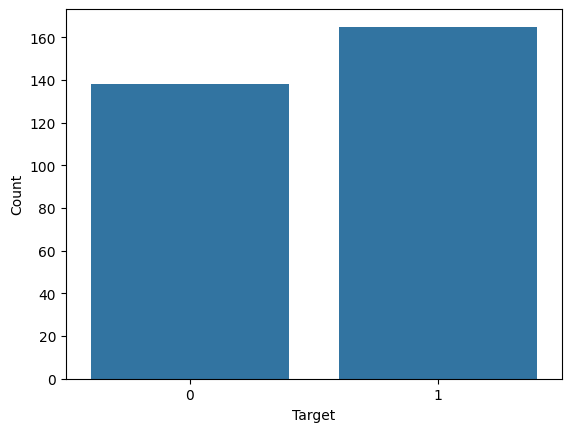

In [18]:
g = sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Count')

<Axes: >

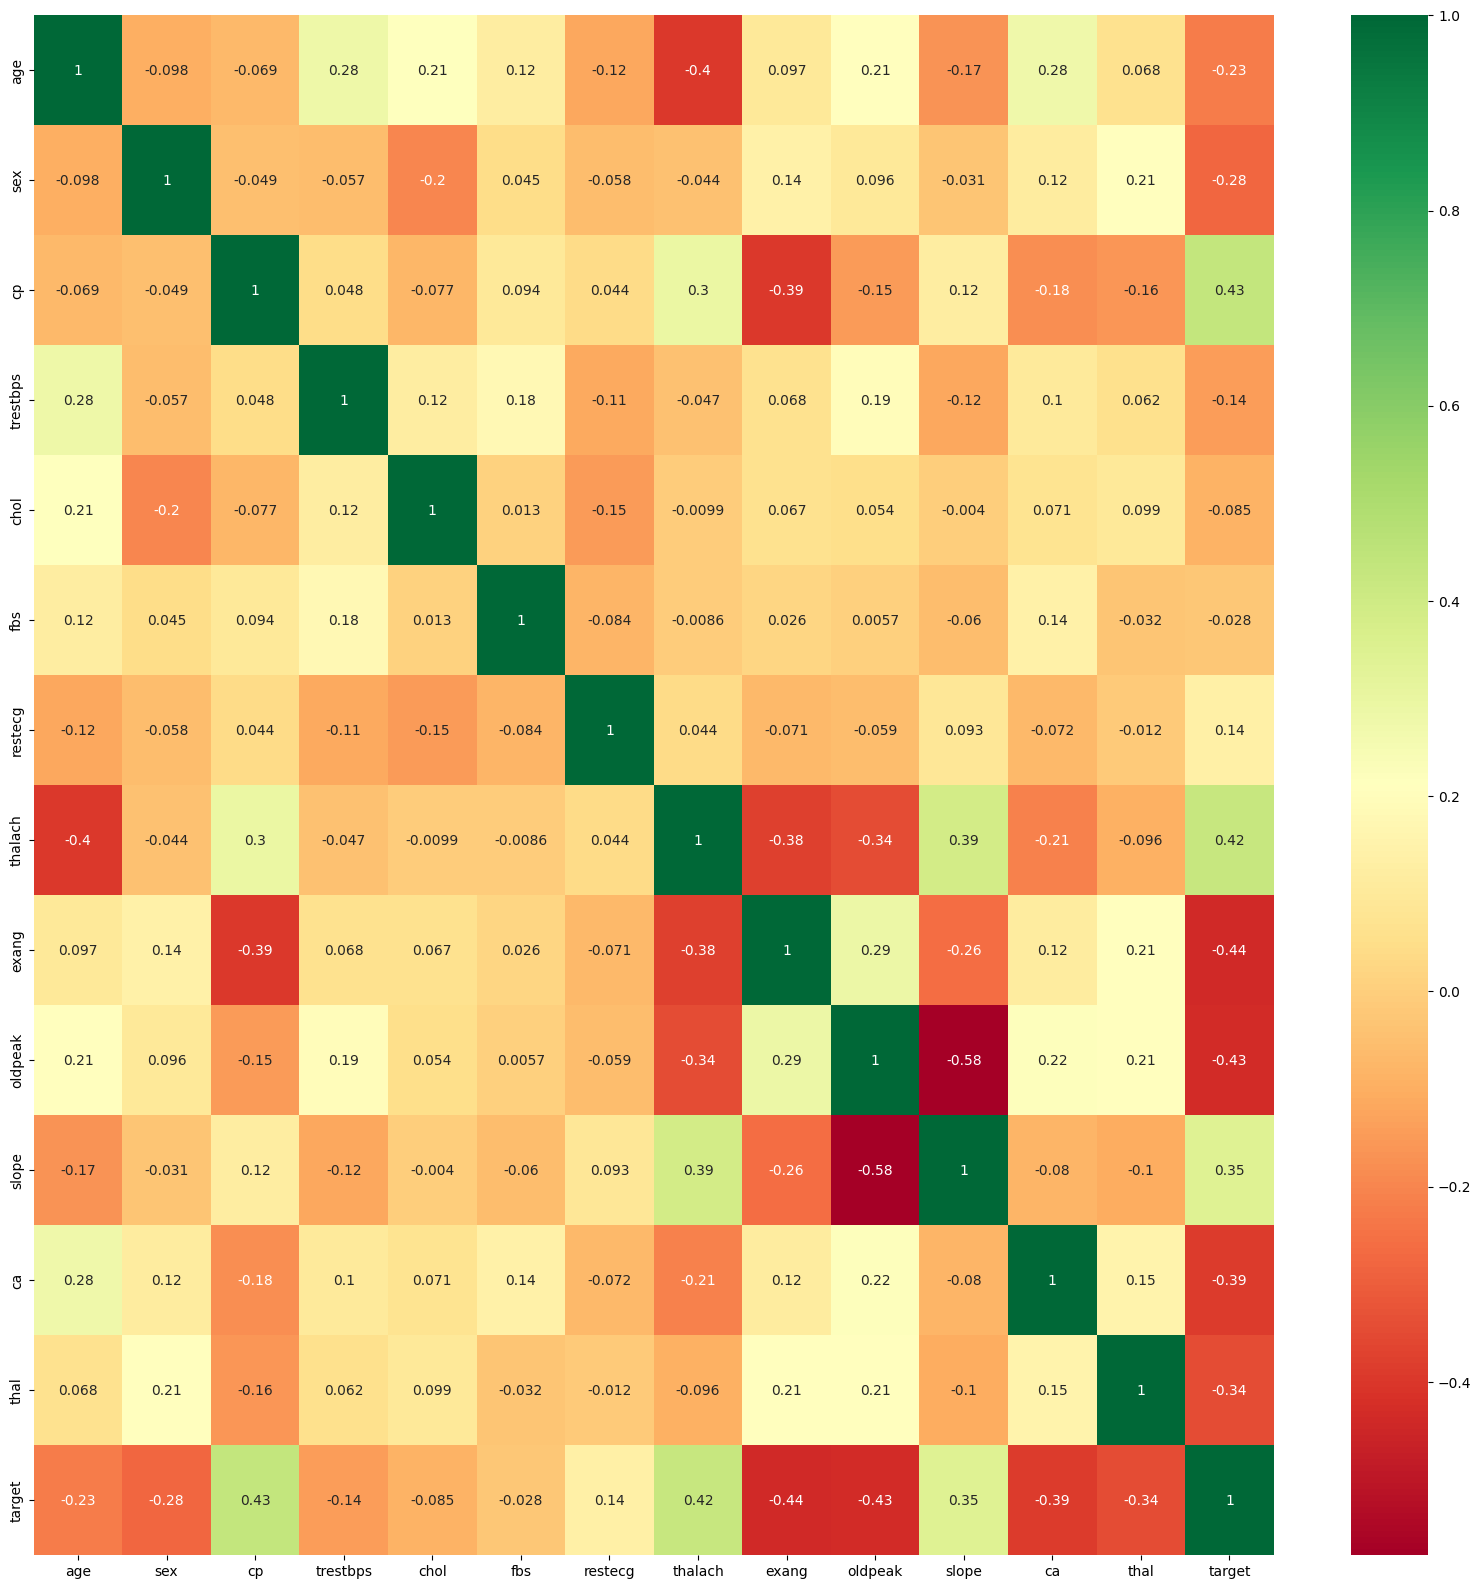

In [19]:
corr_matrix = df.corr()
top_corr_features =corr_matrix.index

plt.figure(figsize=(20, 20))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [22]:
dataset = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = sc.fit_transform(df[columns_to_scale])

In [25]:
X = df.drop("target", axis=1)
y =df["target"]

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8852459016393442


In [33]:
knn_scores = []
for i in range(1, 21):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  cvs_scores = cross_val_score(knn_classifier, X_train, y_train, cv=10)
  knn_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

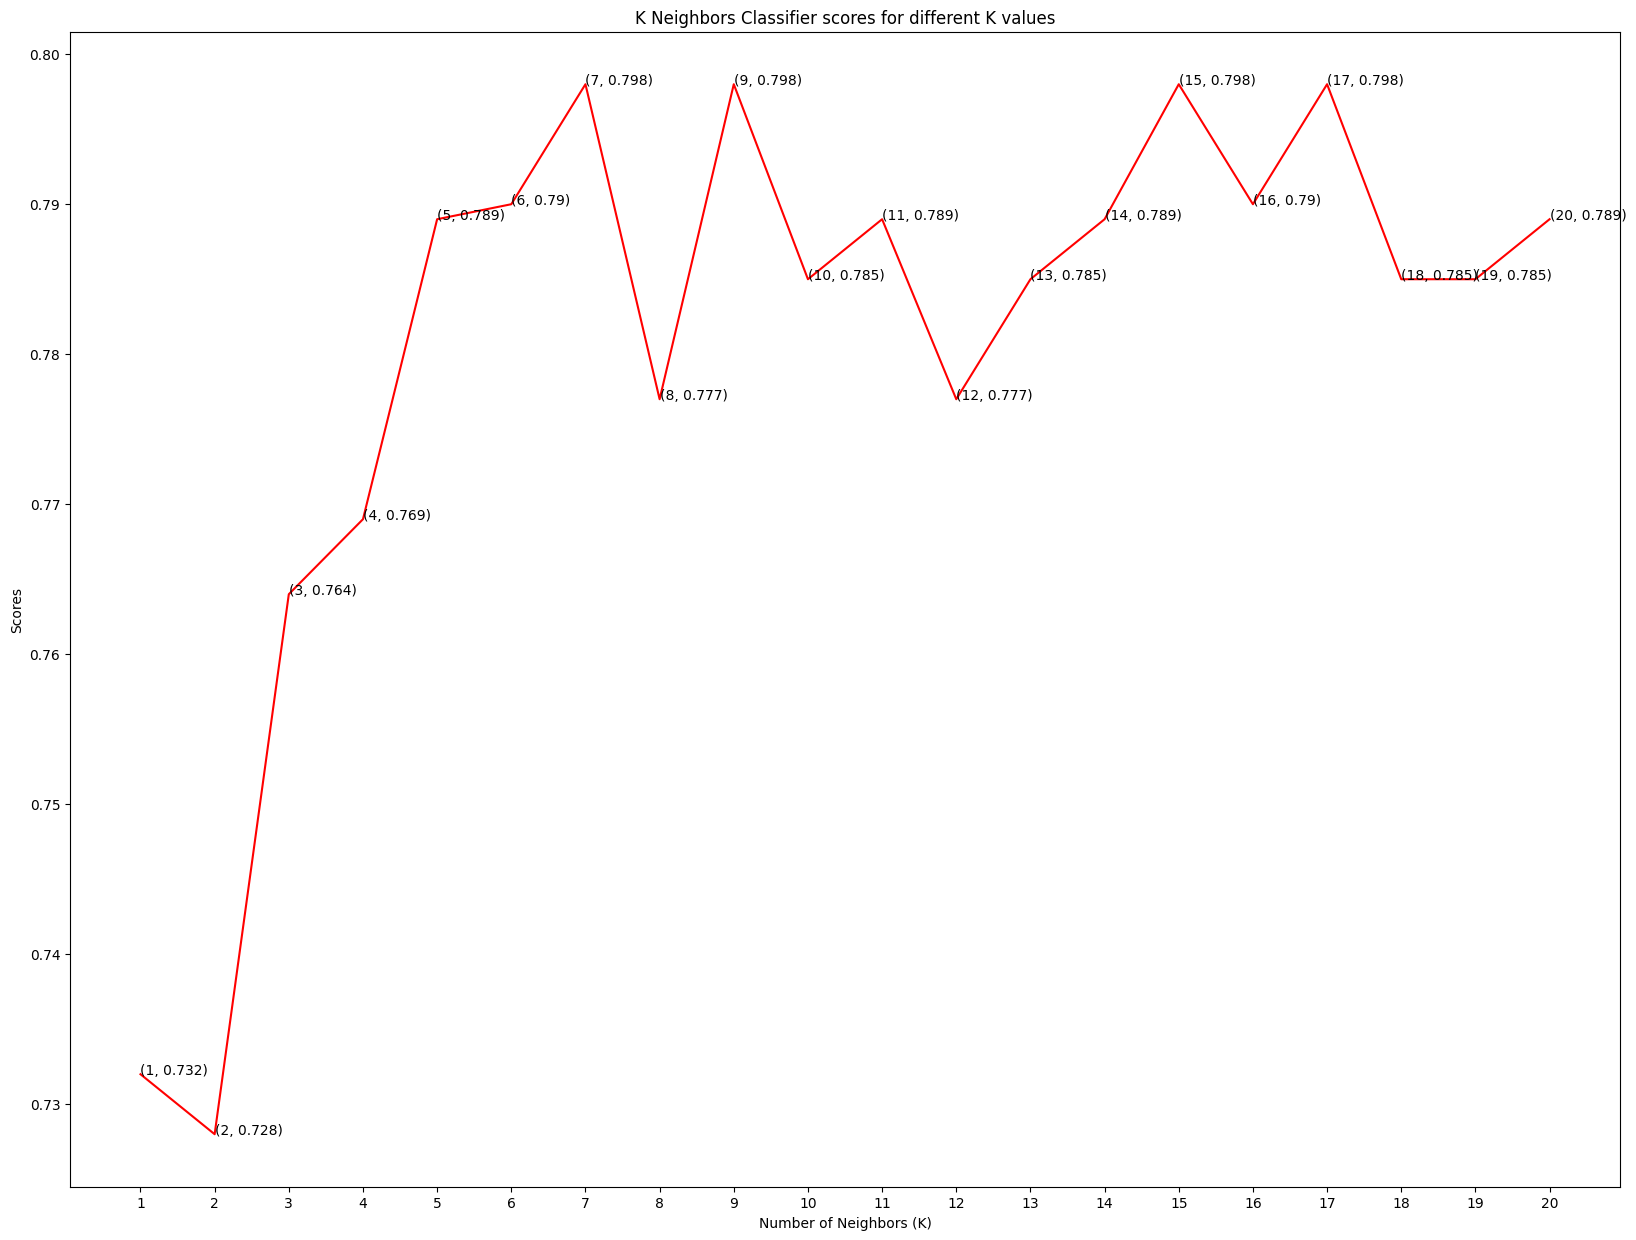

In [34]:
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)


y_pred = dtc.predict(X_test)
train_pred = dtc.predict(X_train)
print(f"Train: {accuracy_score(y_train, train_pred)}")
print(f"Testing: {accuracy_score(y_test, y_pred)}")

Train: 0.8471074380165289
Testing: 0.819672131147541
